# Motor Maintenance

Let's combine the cabapilities of forecasting and anomaly detection for predictive maintenance:

In [2]:
%store -r bucket

In [3]:
%store -r data
data.head()

,device_id,motor_peak_mA,battery
timestamp,,,
2020-02-22 23:59:59,7517a917b42450470661cec1bd4654f8,1335,73
2020-02-22 23:59:59,8e4a851ed2317a249a0903f29d894361,1577,73
2020-02-22 23:59:59,572ddf9d82d5675ed2db832081b70103,1585,73
2020-02-22 23:59:59,b17bbc29ce61265a6212c689a597d4d8,0,73
2020-02-22 23:59:59,19d3c55b134ab7780d2b711211b7cf7c,1286,73


# Exploratory Data Analysis

In [4]:
device_pos = 1
sample_device_id = data.iloc[device_pos]["device_id"]
sample_device_id

'8e4a851ed2317a249a0903f29d894361'

In [5]:
sample_data = data[data["device_id"] == sample_device_id]

In [6]:
motor = sample_data["motor_peak_mA"]

In [7]:
from matplotlib import pyplot
motor.plot()

# Time Series Resampling

In [8]:
hourly = data[data["motor_peak_mA"] > 0]
hourly = (hourly.groupby("device_id")
          .motor_peak_mA
          .resample("H")
          .max())

In [9]:
hourly

device_id                         timestamp          
0001495ce5f079703599a94c32dab2b0  2020-02-24 15:00:00    1843.0
                                  2020-02-24 16:00:00    1906.0
                                  2020-02-24 17:00:00    1909.0
                                  2020-02-24 18:00:00    1540.0
                                  2020-02-24 19:00:00     476.0
                                                          ...  
fffaee1fbb9c96703850f64d3262e843  2020-02-25 17:00:00    2211.0
                                  2020-02-25 18:00:00    1663.0
                                  2020-02-25 19:00:00     841.0
                                  2020-02-25 20:00:00     650.0
                                  2020-02-25 21:00:00     741.0
Name: motor_peak_mA, Length: 529940, dtype: float64

In [10]:
hourly = hourly.reset_index().set_index("timestamp")

In [11]:
hourly

,device_id,motor_peak_mA
timestamp,,
2020-02-24 15:00:00,0001495ce5f079703599a94c32dab2b0,1843.0
2020-02-24 16:00:00,0001495ce5f079703599a94c32dab2b0,1906.0
2020-02-24 17:00:00,0001495ce5f079703599a94c32dab2b0,1909.0
2020-02-24 18:00:00,0001495ce5f079703599a94c32dab2b0,1540.0
2020-02-24 19:00:00,0001495ce5f079703599a94c32dab2b0,476.0
...,...,...
2020-02-25 17:00:00,fffaee1fbb9c96703850f64d3262e843,2211.0
2020-02-25 18:00:00,fffaee1fbb9c96703850f64d3262e843,1663.0
2020-02-25 19:00:00,fffaee1fbb9c96703850f64d3262e843,841.0


In [12]:
hsample = hourly[hourly["device_id"] == sample_device_id]

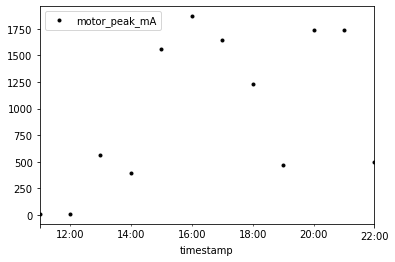

In [13]:
hsample.tail(12).plot(style="k.")

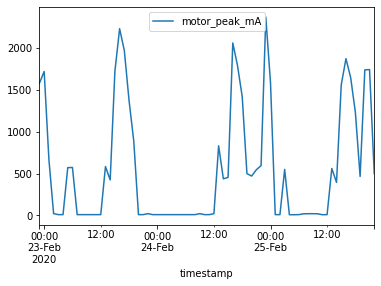

In [14]:
hsample.plot()

## Cross Validation

In [15]:
import pandas as pd

In [16]:
last_time = hourly.tail(1).index[0]
last_time

Timestamp('2020-02-25 21:00:00')

In [17]:
cut_time = last_time - pd.Timedelta('3 hour')
cut_time

Timestamp('2020-02-25 18:00:00')

In [18]:
train_set = hourly.loc[hourly.index <= cut_time]
train_set.tail()

,device_id,motor_peak_mA
timestamp,,
2020-02-25 14:00:00,fffaee1fbb9c96703850f64d3262e843,672.0
2020-02-25 15:00:00,fffaee1fbb9c96703850f64d3262e843,707.0
2020-02-25 16:00:00,fffaee1fbb9c96703850f64d3262e843,2286.0
2020-02-25 17:00:00,fffaee1fbb9c96703850f64d3262e843,2211.0
2020-02-25 18:00:00,fffaee1fbb9c96703850f64d3262e843,1663.0


In [19]:
test_set = hourly.loc[hourly.index > cut_time]
test_set.head()

,device_id,motor_peak_mA
timestamp,,
2020-02-25 19:00:00,0001495ce5f079703599a94c32dab2b0,688.0
2020-02-25 20:00:00,0001495ce5f079703599a94c32dab2b0,440.0
2020-02-25 21:00:00,0001495ce5f079703599a94c32dab2b0,550.0
2020-02-25 19:00:00,00134c004e33e830e5dbce3355a485b9,667.0
2020-02-25 20:00:00,00134c004e33e830e5dbce3355a485b9,454.0


In [20]:
sample_train = train_set[train_set["device_id"] == sample_device_id]
sample_test = test_set[test_set["device_id"] == sample_device_id]

In [21]:
sample_train.tail()

,device_id,motor_peak_mA
timestamp,,
2020-02-25 14:00:00,8e4a851ed2317a249a0903f29d894361,394.0
2020-02-25 15:00:00,8e4a851ed2317a249a0903f29d894361,1557.0
2020-02-25 16:00:00,8e4a851ed2317a249a0903f29d894361,1869.0
2020-02-25 17:00:00,8e4a851ed2317a249a0903f29d894361,1643.0
2020-02-25 18:00:00,8e4a851ed2317a249a0903f29d894361,1228.0


In [22]:
sample_test.head()

,device_id,motor_peak_mA
timestamp,,
2020-02-25 19:00:00,8e4a851ed2317a249a0903f29d894361,465.0
2020-02-25 20:00:00,8e4a851ed2317a249a0903f29d894361,1735.0
2020-02-25 21:00:00,8e4a851ed2317a249a0903f29d894361,1739.0
2020-02-25 22:00:00,8e4a851ed2317a249a0903f29d894361,497.0


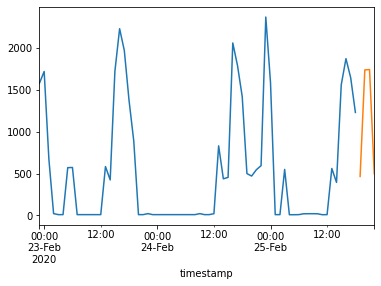

In [23]:
from matplotlib import pyplot

ax = sample_train["motor_peak_mA"].plot(label="train")
sample_test["motor_peak_mA"].plot(ax=ax,label="test")

## DeepAR Training

Convert the data from pandas DataFrame to the expected JSON Lines:

In [24]:
import json
import math

def df_to_tss(dataframe):
    df = dataframe.copy()
    df["timeindex"] = df.index
    cats = {}
    tss = {}
    for index, row in df.iterrows():
        target = row["motor_peak_mA"]
        if not(math.isnan(target)):
            identity = row["device_id"]
            cat = cats.get(identity)
            if not cat:
                cat = len(cats)
                start = str(row["timeindex"])
                ts = {
                    "start": start,
                    "cat": [cat],
                    "target": [],
                }
                cats[identity] = cat
                tss[cat] = ts
            ts = tss.get(cat)
            ts["target"].append(target)
    return tss

def tss_to_jsonl(tss):  
    result = ""
    for key, value in tss.items():
        jsonll = json.dumps(value)
        result += jsonll
        result += "\n"
    return result[:-1]

def df_to_jsonl(dataframe):
    return tss_to_jsonl(df_to_tss(dataframe))

In [25]:
import time
start = time.time()
jsonl = df_to_jsonl(train_set.head(100))
elapsed = time.time() - start
print(elapsed)
print(jsonl)

0.017748117446899414
{"start": "2020-02-24 15:00:00", "cat": [0], "target": [1843.0]}
{"start": "2020-02-24 16:00:00", "cat": [1], "target": [2171.0, 1949.0, 1769.0, 871.0, 477.0, 529.0, 570.0, 2202.0, 1483.0, 734.0, 10.0, 532.0, 817.0, 519.0, 617.0, 2146.0, 1870.0, 1397.0]}
{"start": "2020-02-24 15:00:00", "cat": [2], "target": [10.0, 2145.0, 1772.0, 1392.0, 909.0, 556.0, 658.0, 680.0, 2354.0, 1151.0, 21.0, 21.0, 10.0, 21.0, 21.0, 20.0, 10.0, 10.0, 21.0, 9.0, 20.0, 10.0, 681.0, 553.0, 608.0, 2014.0, 1685.0, 1518.0]}
{"start": "2020-02-24 15:00:00", "cat": [3], "target": [1580.0, 1997.0, 1735.0, 1202.0, 952.0, 436.0, 648.0, 694.0, 2252.0, 1345.0, 621.0, 10.0, 9.0, 10.0, 562.0]}


In [26]:
import time
start = time.time()

train_tss = df_to_tss(train_set)
train_jsonl = tss_to_jsonl(train_tss)

test_tss = df_to_tss(test_set)
test_jsonl = tss_to_jsonl(test_tss)

elapsed = time.time() - start
print(elapsed)

68.66240382194519


In [27]:
import pathlib

prefix = "mt-motor-maintenance"
input_path = "./{}/input".format(prefix)

train_path = "{}/train.json".format(input_path)
test_path = "{}/test.json".format(input_path)
(train_path,test_path)

('./mt-motor-maintenance/input/train.json',
 './mt-motor-maintenance/input/test.json')

In [28]:
import shutil

shutil.rmtree(input_path, ignore_errors=True)
pathlib.Path(input_path).mkdir(parents=True, exist_ok=True)

In [29]:
with open(train_path, "w") as text_file:
    print(train_jsonl, file=text_file)

with open(test_path, "w") as text_file:
    print(test_jsonl, file=text_file)

In [30]:
! ls -liah "{input_path}/"

total 5.2M
1048690 drwxrwxr-x 2 ec2-user ec2-user 4.0K May 14 08:43 .
1048689 drwxrwxr-x 3 ec2-user ec2-user 4.0K May 14 08:43 ..
1048692 -rw-rw-r-- 1 ec2-user ec2-user 1.4M May 14 08:43 test.json
1048691 -rw-rw-r-- 1 ec2-user ec2-user 3.8M May 14 08:43 train.json


In [31]:
%store -r bucket

In [32]:
!aws s3 sync "{input_path}/" "s3://{bucket}/{prefix}/" --delete

upload: mt-motor-maintenance/input/test.json to s3://mt-ml-workshop-pi1g9mn3/mt-motor-maintenance/test.json
upload: mt-motor-maintenance/input/train.json to s3://mt-ml-workshop-pi1g9mn3/mt-motor-maintenance/train.json


In [33]:
!aws s3 ls "s3://{bucket}/{prefix}/" 

2020-05-14 08:43:23    1373977 test.json
2020-05-14 08:43:23    3962421 train.json


In [34]:
dar_input = {
    "train": "s3://{}/{}/train.json".format(bucket,prefix),
    "test": "s3://{}/{}/test.json".format(bucket,prefix)
}
dar_input

{'train': 's3://mt-ml-workshop-pi1g9mn3/mt-motor-maintenance/train.json',
 'test': 's3://mt-ml-workshop-pi1g9mn3/mt-motor-maintenance/test.json'}

In [35]:
train_instance_type='ml.c5.2xlarge' #Estimated Training Time: 10m

In [36]:
import boto3
import sagemaker
from sagemaker.amazon.amazon_estimator import get_image_uri

dar_image_name = get_image_uri(boto3.Session().region_name, 'forecasting-deepar')
dar_image_name

'224300973850.dkr.ecr.eu-west-1.amazonaws.com/forecasting-deepar:1'

In [37]:
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

dar_estimator = sagemaker.estimator.Estimator(
    sagemaker_session=sagemaker_session,
    image_name=dar_image_name,
    role=role,
    train_instance_count=1,
    train_instance_type=train_instance_type,
    base_job_name=prefix,
    output_path="s3://{}/{}/output/".format(bucket,prefix)
)

In [38]:
freq = 'H'
prediction_length = 4
context_length = 12

In [39]:
dar_hyperparameters = {
    "time_freq": freq,
    "context_length": str(context_length),
    "prediction_length": str(prediction_length),
    "num_cells": "40",
    "num_layers": "3",
    "likelihood": "gaussian",
    "epochs": "20",
    "mini_batch_size": "32",
    "learning_rate": "0.001",
    "dropout_rate": "0.05",
    "early_stopping_patience": "10",
    "cardinality": "auto",
    "num_dynamic_feat":"ignore"
}
dar_estimator.set_hyperparameters(**dar_hyperparameters)

In [ ]:
dar_estimator.fit(inputs=dar_input)

2020-05-14 08:43:24 Starting - Starting the training job...
2020-05-14 08:43:26 Starting - Launching requested ML instances...
2020-05-14 08:44:24 Starting - Preparing the instances for training......
2020-05-14 08:45:15 Downloading - Downloading input data..

In [ ]:
dar_job_name = dar_estimator.latest_training_job.name
dar_job_name

# Random Cut Forest Training

In [ ]:
anomalies = data[["motor_peak_mA"]]
anomalies = anomalies[anomalies["motor_peak_mA"] > 0]
anomalies.info()

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_dataframe = train_test_split(anomalies, test_size=0.2)

In [ ]:
test_data = test_dataframe.copy()
test_data["anomaly"] = test_data["motor_peak_mA"] > 4000
test_data["anomaly"] = test_data["anomaly"] | (test_data["motor_peak_mA"] > 50) & (test_data["motor_peak_mA"] < 200)
test_data["anomaly"] = test_data["anomaly"].astype(int) 
test_data.groupby("anomaly").count().head()

In [ ]:
test_data.describe()

In [ ]:
train_data.describe()

In [ ]:
train_array = train_data.values
train_array

In [ ]:
test_array = test_data[["motor_peak_mA"]].values
test_array

In [ ]:
labels_array = test_data["anomaly"].values
labels_array

In [ ]:
import io
import numpy as np
import sagemaker
import sagemaker.amazon.common as smac
import boto3

s3bucket = boto3.resource('s3').Bucket(bucket)

def upload_records(array,key,labels=None):
    result = {} 
    buf = io.BytesIO()
    if (labels is not None):
        smac.write_numpy_to_dense_tensor(buf, array, labels)
    else:
        smac.write_numpy_to_dense_tensor(buf, array)
    buf.seek(0)
    s3bucket.Object(key).upload_fileobj(buf)

In [ ]:
import os

s3 = boto3.client("s3")
prefix = "mt-motor-anomaly" 

cwd = os.getcwd()
train_key  = "{}/input/{}".format(prefix,"train.rio")
test_key  = "{}/input/{}".format(prefix, "test.rio")

upload_records(train_array,train_key)
upload_records(test_array,test_key,labels_array)

train_input = sagemaker.s3_input(
       s3_data="s3://{}/{}".format(bucket,train_key),
       content_type='application/x-recordio-protobuf',
       distribution='ShardedByS3Key')

test_input = sagemaker.s3_input(
       s3_data="s3://{}/{}".format(bucket,test_key),
       content_type='application/x-recordio-protobuf',
       distribution='FullyReplicated')

rcf_input = {
    'train': train_input,
    'test': test_input     
}

rcf_input

In [ ]:
region = boto3.Session().region_name
from sagemaker.amazon.amazon_estimator import get_image_uri

rcf_container = get_image_uri(region, 'randomcutforest')
rcf_container

In [ ]:
rcf_hparams = {
    "num_samples_per_tree":512,
    "num_trees":50,
    "feature_dim":1,
    "eval_metrics": "accuracy"
}

In [ ]:
rcf_estimator = sagemaker.estimator.Estimator(
                      rcf_container,
                      role=sagemaker.get_execution_role(),
                      train_instance_count=1,
                      train_instance_type='ml.m5.large',
                      base_job_name="mt-motor-anomaly",
                      output_path='s3://{}/{}/output'.format(bucket, prefix),
                      hyperparameters = rcf_hparams )

In [ ]:
rcf_estimator.fit(rcf_input)

In [ ]:
print('Training job name: {}'.format(rcf_estimator.latest_training_job.job_name))

# Random Cut Forest Inference

In [ ]:
rcf_inference = rcf_estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.large',
)

In [ ]:
rcf_inference_endpoint = rcf_inference.endpoint
%store rcf_inference_endpoint
rcf_inference_endpoint

In [ ]:
from sagemaker.predictor import csv_serializer, json_deserializer

rcf_inference.content_type = 'text/csv'
rcf_inference.serializer = csv_serializer
rcf_inference.accept = 'application/json'
rcf_inference.deserializer = json_deserializer

In [ ]:
sample_data = train_data[:5].values
sample_data

In [ ]:
results = rcf_inference.predict(sample_data)
results

In [ ]:
import pandas as pd
sigmas = 1

scores = results["scores"]
scores = [score["score"] for score in scores]
series = pd.Series(scores)
score_mean = series.mean()
score_max = series.max()
score_std = series.std()
score_cutoff = score_mean + sigmas*score_std
(score_mean,score_max,score_std,score_cutoff)

In [ ]:
anomalies = series[series > score_cutoff ]  
anomalies

In [ ]:
"{} anomalies detected".format(len(anomalies))

# Deep AR Inference

In [ ]:
dar_endpoint_name = sagemaker_session.endpoint_from_job(
    job_name=dar_job_name,
    initial_instance_count=1,
    instance_type='ml.m5.large',
    deployment_image=dar_image_name,
    role=role
)
dar_endpoint_name

In [ ]:
len(train_tss)

In [ ]:
instances = list(train_tss.values())[0:100]

In [ ]:
len(instances)

In [ ]:
inference = {
    "instances": instances,
    "configuration": {
         "output_types": ["mean"]
    }
}

In [ ]:
import json
inference_json = json.dumps(inference, indent=2)
print(inference_json)

In [ ]:
predictor = sagemaker.predictor.RealTimePredictor(
    dar_endpoint_name, 
    sagemaker_session=sagemaker_session, 
    content_type="application/json")
predictor

In [ ]:
prediction = predictor.predict(inference_json)
prediction = json.loads(prediction)
prediction

In [ ]:
predictions = prediction["predictions"]
predictions = [p["mean"] for p in predictions]
predictions

In [ ]:
sigmas = 1.25
maintenance = []

for i, preds in enumerate(predictions):
    infer_data = [[t] for t in preds]
    results = rcf_inference.predict(infer_data)
    scores = results["scores"]
    scores = [score["score"] for score in scores]
    series = pd.Series(scores)
    score_mean = series.mean()
    score_max = series.max()
    score_std = series.std()
    score_cutoff = score_mean + sigmas*score_std
    anomalies = series[series > score_cutoff ]
    if not anomalies.empty:
        maintenance.append(i)
        print(" Device {} = {} anomalies (max = {}, cutoff = {})".format(i, len(anomalies), score_max, score_cutoff ))

In [ ]:
"Requesting maintenance for {} devices".format(len(maintenance))

# Cleanup

Congratulations, you have saved a lot of trips to failed moontracer devices and made lunar energy more efficient and reliable.

Don't forget to [delete unused resources](mt-cleanup.ipynb).